En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [4]:
sol= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\solana.csv')

In [5]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1227 non-null   object 
 1   PRECIO-usd      1227 non-null   float64
 2   MARKET_CAP-usd  1227 non-null   float64
 3   TOTAL_VOLUMES   1227 non-null   float64
 4   COIN_ID         1227 non-null   object 
dtypes: float64(3), object(2)
memory usage: 48.1+ KB


In [6]:
sol.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1227.000000,1.227000e+03,1.227000e+03
mean,45.461639,1.432665e+10,9.805695e+08
std,56.199046,1.714990e+10,1.287443e+09
min,0.513923,4.171226e+06,5.489101e+05
25%,8.267369,2.179096e+09,1.135716e+08
50%,24.426628,8.762955e+09,5.677220e+08
75%,44.210964,1.455337e+10,1.358824e+09
max,259.239558,7.742731e+10,1.614909e+10


In [7]:
sol['FECHAS']=pd.to_datetime(sol['FECHAS'])

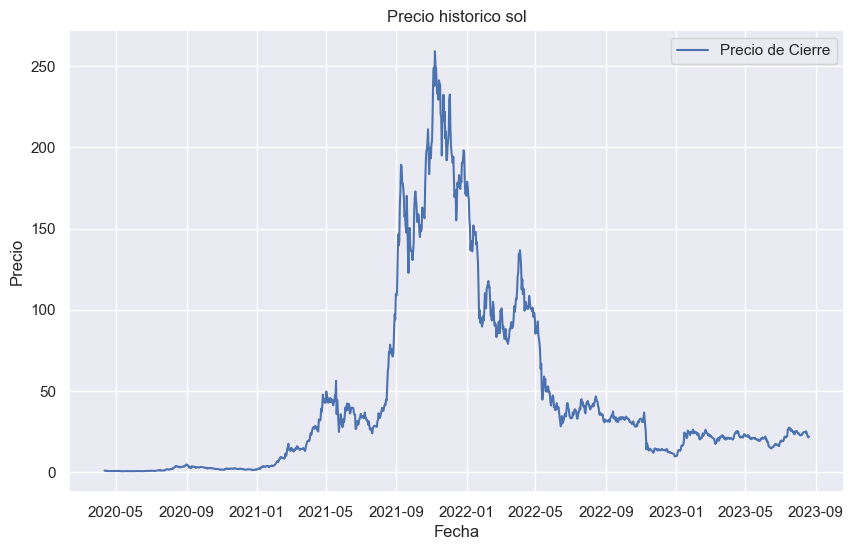

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(sol['FECHAS'], sol['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico sol')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

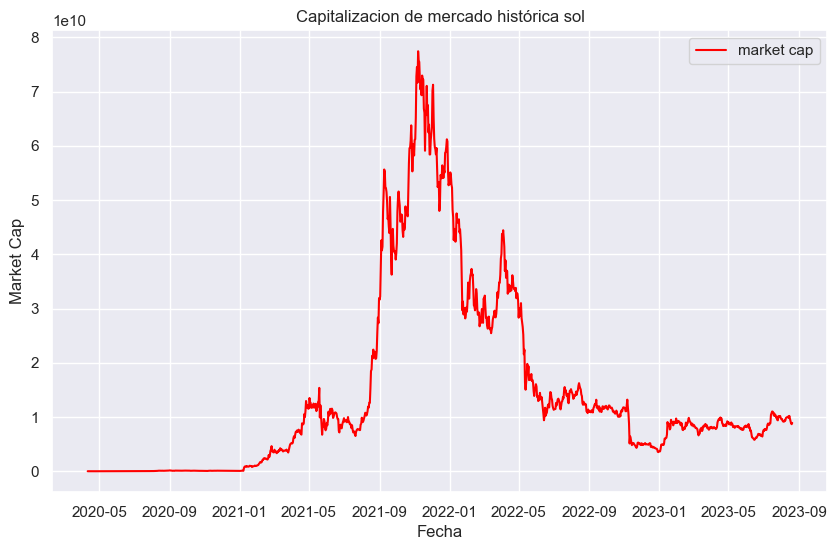

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(sol['FECHAS'], sol['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica sol')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

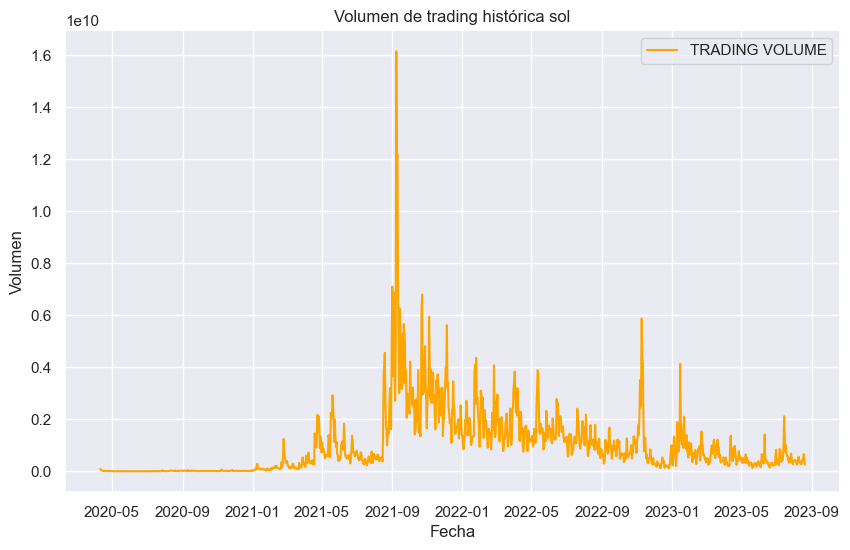

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sol['FECHAS'], sol['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica sol')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(sol['PRECIO-usd'], window=rsi_period)
sol['RSI'] = indicator.rsi()

sol.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1222,2023-08-16,23.875641,9.697572e+09,4.525215e+08,solana,50.012978
1223,2023-08-17,22.846368,9.300306e+09,4.952949e+08,solana,44.080328
1224,2023-08-18,21.646962,8.833376e+09,6.564125e+08,solana,38.368663
1225,2023-08-19,21.330196,8.681696e+09,4.122202e+08,solana,37.004916
1226,2023-08-20,21.878330,8.915137e+09,2.541815e+08,solana,40.918225


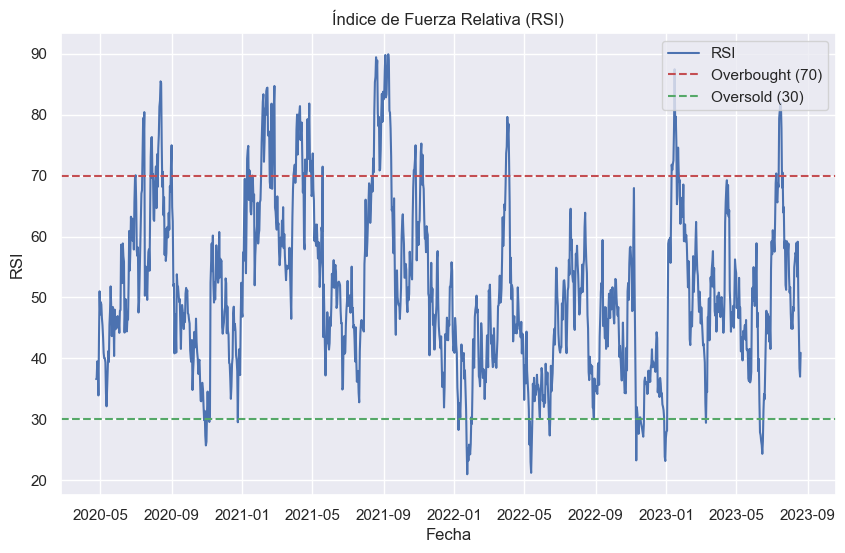

In [12]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(sol['FECHAS'], sol['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
rolling_window = 50
sol['MovingAverage'] = sol['PRECIO-usd'].rolling(window=rolling_window).mean()

print(sol.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES COIN_ID  RSI  \
0 2020-04-11    0.957606    7.827652e+06   9.267267e+07  solana  NaN   
1 2020-04-12    0.784711    6.173608e+06   4.945869e+07  solana  NaN   
2 2020-04-13    0.875994    7.269680e+06   3.782101e+07  solana  NaN   
3 2020-04-14    0.786712    6.302364e+06   1.957921e+07  solana  NaN   
4 2020-04-15    0.666673    5.306221e+06   1.752353e+07  solana  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


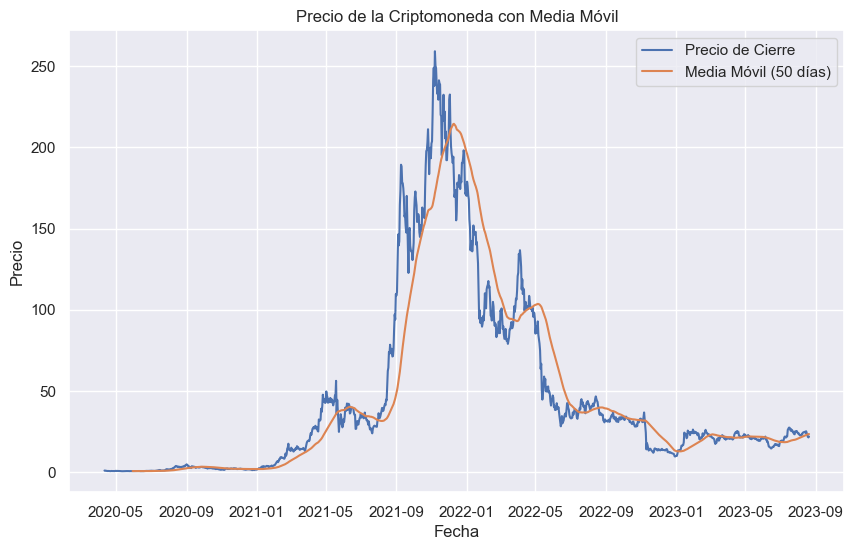

In [14]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(sol['FECHAS'], sol['PRECIO-usd'], label='Precio de Cierre')
plt.plot(sol['FECHAS'], sol['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
sol.to_csv('solDB.csv', index=False)